In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data (adjust the path if necessary)
df = pd.read_csv("202205-divvy-tripdata.csv")

In [13]:
# Convert 'started_at' and 'ended_at' columns to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

# Extract time-based features
df['hour'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()

# Order for consistent plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

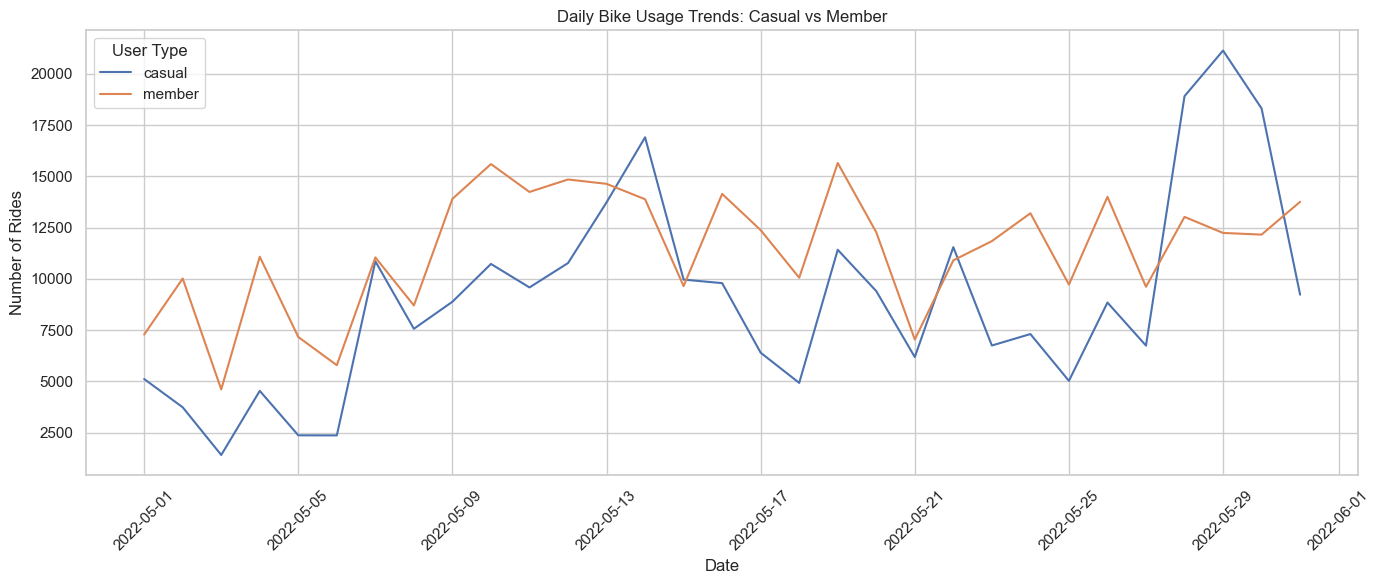

In [41]:
# Group by day and member type
df['date'] = df['started_at'].dt.date
daily_counts = df.groupby(['date', 'member_casual']).size().reset_index(name='ride_count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_counts, x='date', y='ride_count', hue='member_casual')
plt.title("Daily Bike Usage Trends: Casual vs Member")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend(title="User Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line graph presents daily bike usage trends for casual users and members over a one-month period, from May 1 to June 1, 2022. Members consistently recorded higher bike usage compared to casual users, reflecting a more routine, possibly commuter-driven pattern. While casual users exhibited generally lower activity, notable peaks appeared around May 25 and May 29, suggesting increased demand on specific days, potentially linked to weekends or special events. The fluctuations in both groups indicate varying usage behaviors, with members demonstrating steady engagement while casual users show spikes in activity, likely influenced by leisure opportunities. These insights can be valuable in optimizing bike-sharing operations and predicting demand variations throughout a given month.


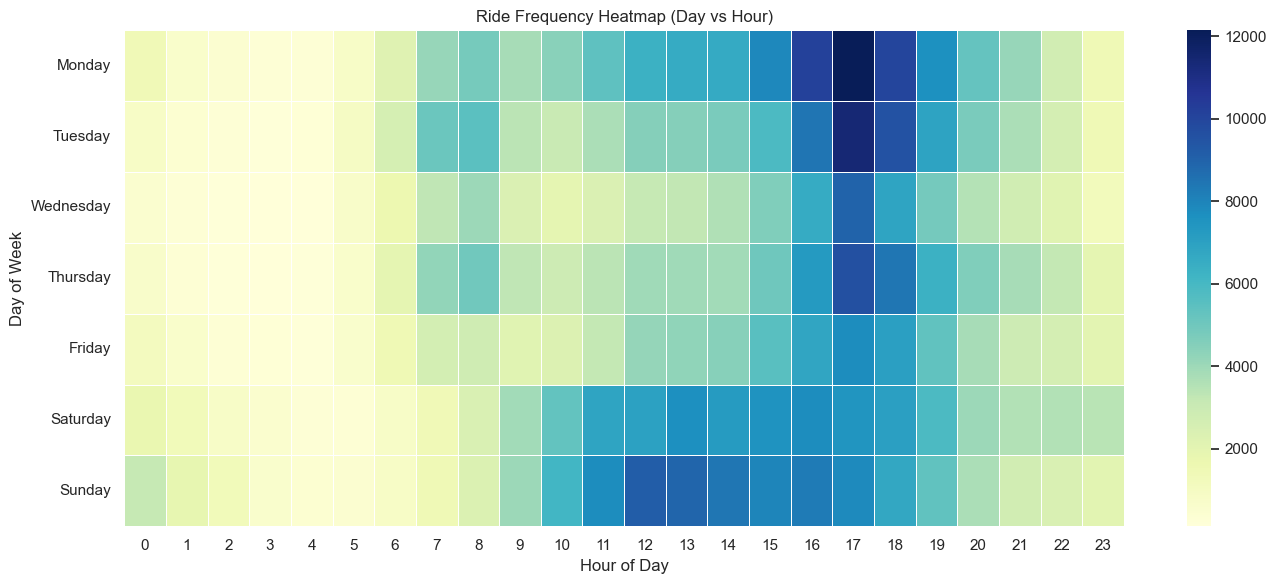

In [43]:
# Create a pivot table: days vs hours
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', 
                               values='ride_id', aggfunc='count').reindex(day_order)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Ride Frequency Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


The heatmap illustrates ride frequency patterns across different days of the week and hours of the day. The color gradient indicates ride volume, with darker blue shades representing higher frequencies. Notably, rides peak on Tuesday between 16:00 and 18:00, suggesting increased demand during late afternoon hours, potentially due to commuting. Additionally, Saturday sees a consistent rise in ride frequency from 10:00 to 18:00, indicating strong leisure or weekend activity. Other weekdays also show moderate ride activity concentrated around typical commuting hours. This visualization provides valuable insights for optimizing bike availability and adjusting services to meet demand during peak times.
